In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datagen=ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rescale=1./255
)

In [3]:
train = datagen.flow_from_directory(r"/kaggle/input/tomatoleaf/tomato/train", batch_size=32, class_mode='categorical',  shuffle=True)
val = datagen.flow_from_directory(r"/kaggle/input/tomatoleaf/tomato/val", batch_size=32, class_mode='categorical',  shuffle=True)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [4]:
model= Sequential([
    Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(),
    

    Conv2D(128,(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(), 
   
    Conv2D(256,(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(), 

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  
    Dense(10, activation='softmax') 
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440,970 (1.68 MB)

 Trainable params: 440,074 (1.68 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC, TopKCategoricalAccuracy

ckpt = ModelCheckpoint("model_epoch_{epoch:02d}.keras", save_freq='epoch')

model.compile(optimizer=Adam(learning_rate=0.0001),  
              loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall(), AUC(), TopKCategoricalAccuracy(k=2)])

# Train model without early stopping
history = model.fit(
    train, validation_data=val, epochs=30, callbacks=[ckpt]  
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 246s 733ms/step - accuracy: 0.4623 - auc: 0.8430 - loss: 1.5671 - precision: 0.7546 - recall: 0.2177 - top_k_categorical_accuracy: 0.6320 - val_accuracy: 0.1290 - val_auc: 0.5533 - val_loss: 3.4209 - val_precision: 0.2714 - val_recall: 0.0950 - val_top_k_categorical_accuracy: 0.2980
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 519ms/step - accuracy: 0.7106 - auc: 0.9627 - loss: 0.8429 - precision: 0.8407 - recall: 0.5597 - top_k_categorical_accuracy: 0.8708 - val_accuracy: 0.5540 - val_auc: 0.9237 - val_loss: 1.1761 - val_precision: 0.6801 - val_recall: 0.3700 - val_top_k_categorical_accuracy: 0.7910
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 528ms/step - accuracy: 0.7795 - auc: 0.9758 - loss: 0.6725 - precision: 0.8742 - recall: 0.6691 - top_k_categorical_accuracy: 0.9115 - val_accuracy: 0.8340 - val_auc: 0.9854 - val_loss: 0.5545 - val_precision: 0.9287 - val_recall: 0.7420 - val_top_k_categorical_accuracy: 0.9310
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━

In [8]:
model.save("model.keras")

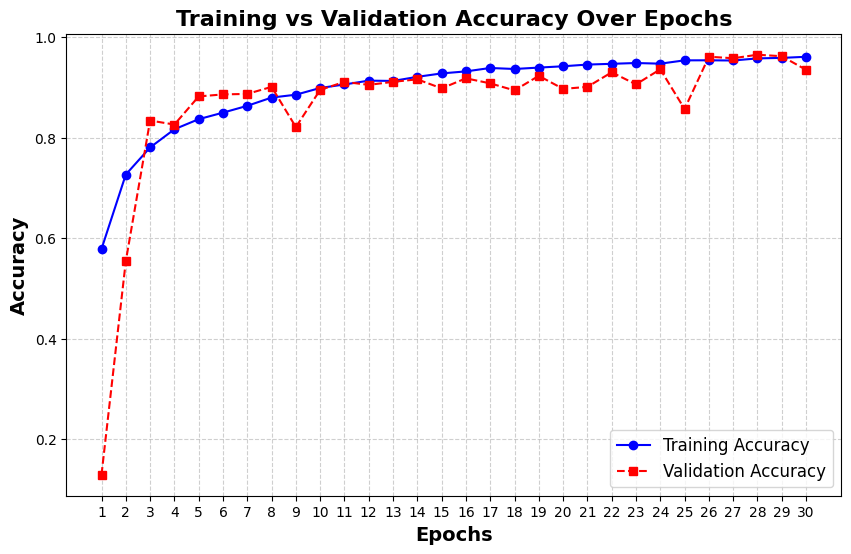

In [11]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))  
plt.plot(epochs, train_acc, marker='o', linestyle='-', color='blue', label='Training Accuracy')  # Train accuracy
plt.plot(epochs, val_acc, marker='s', linestyle='--', color='red', label='Validation Accuracy')  # Validation accuracy

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Accuracy Over Epochs', fontsize=16, fontweight='bold')

plt.xticks(epochs)  
plt.grid(True, linestyle='--', alpha=0.6)  
plt.legend(fontsize=12)  

plt.show()


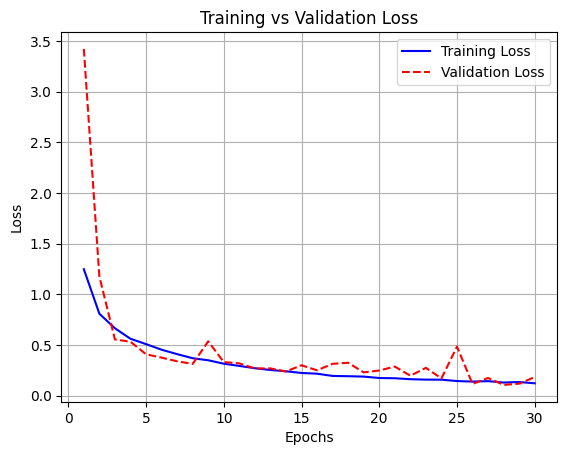

In [24]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()


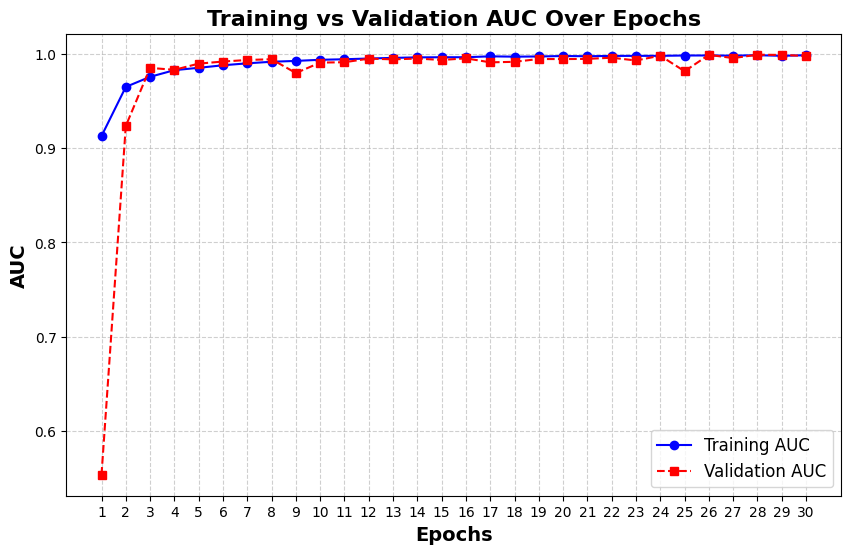

In [12]:
import matplotlib.pyplot as plt

train_auc = history.history['auc']
val_auc = history.history['val_auc']

epochs = range(1, len(train_auc) + 1)


plt.figure(figsize=(10, 6))
plt.plot(epochs, train_auc, marker='o', linestyle='-', color='blue', label='Training AUC')
plt.plot(epochs, val_auc, marker='s', linestyle='--', color='red', label='Validation AUC')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('AUC', fontsize=14, fontweight='bold')
plt.title('Training vs Validation AUC Over Epochs', fontsize=16, fontweight='bold')


plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)


plt.show()


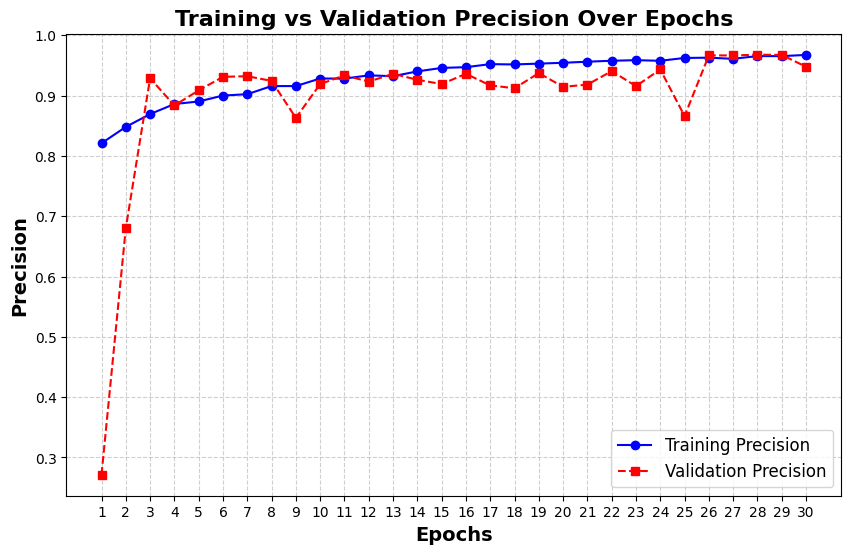

In [13]:

train_precision = history.history['precision']
val_precision = history.history['val_precision']


epochs = range(1, len(train_precision) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_precision, marker='o', linestyle='-', color='blue', label='Training Precision')
plt.plot(epochs, val_precision, marker='s', linestyle='--', color='red', label='Validation Precision')


plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Precision Over Epochs', fontsize=16, fontweight='bold')


plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()


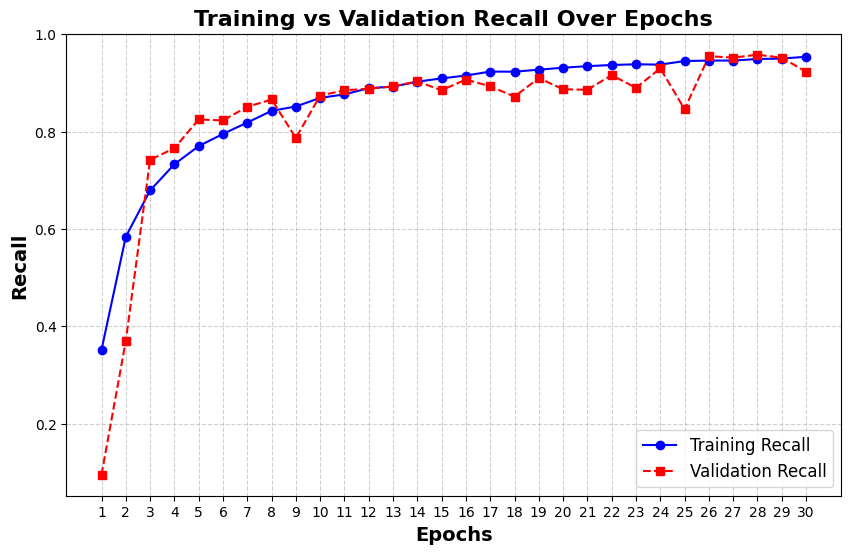

In [14]:

train_recall = history.history['recall']
val_recall = history.history['val_recall']


epochs = range(1, len(train_recall) + 1)


plt.figure(figsize=(10, 6))
plt.plot(epochs, train_recall, marker='o', linestyle='-', color='blue', label='Training Recall')
plt.plot(epochs, val_recall, marker='s', linestyle='--', color='red', label='Validation Recall')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Recall', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Recall Over Epochs', fontsize=16, fontweight='bold')

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show plot
plt.show()


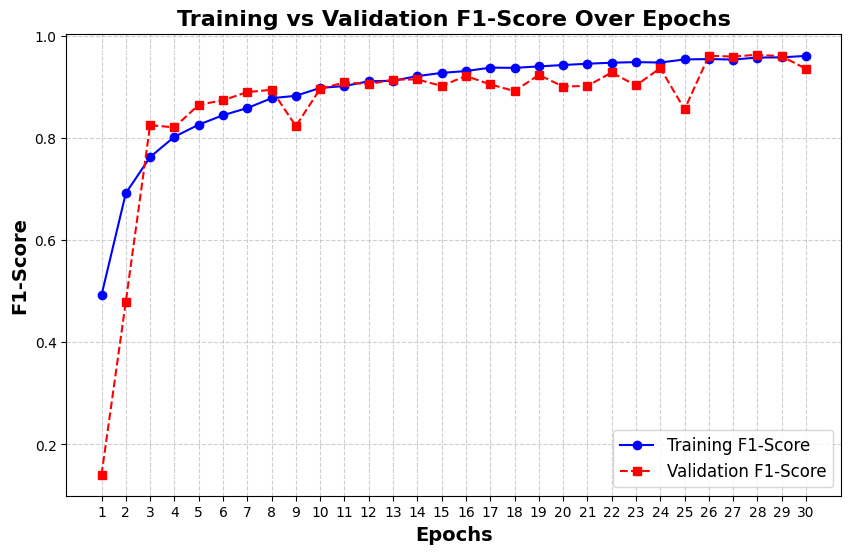

In [15]:
import numpy as np

train_f1 = 2 * np.array(train_precision) * np.array(train_recall) / (np.array(train_precision) + np.array(train_recall) + 1e-10)
val_f1 = 2 * np.array(val_precision) * np.array(val_recall) / (np.array(val_precision) + np.array(val_recall) + 1e-10)

epochs = range(1, len(train_f1) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_f1, marker='o', linestyle='-', color='blue', label='Training F1-Score')
plt.plot(epochs, val_f1, marker='s', linestyle='--', color='red', label='Validation F1-Score')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score', fontsize=14, fontweight='bold')
plt.title('Training vs Validation F1-Score Over Epochs', fontsize=16, fontweight='bold')

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()


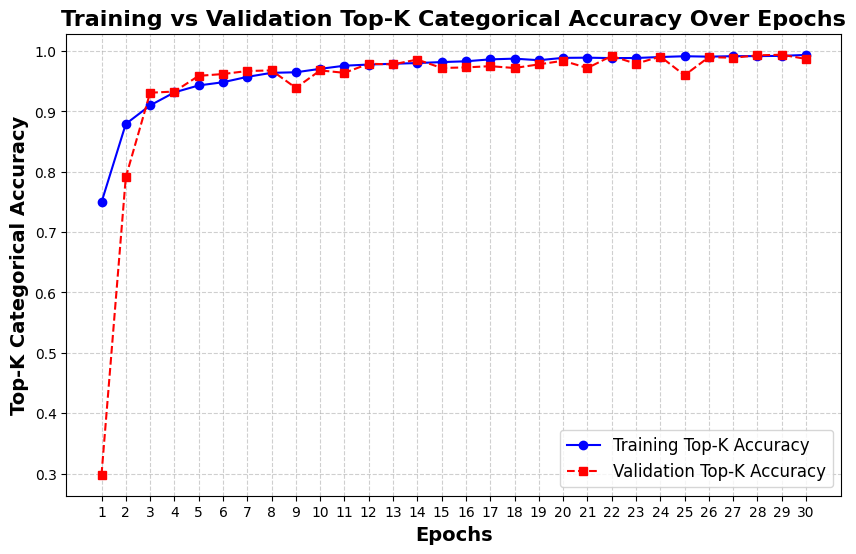

In [16]:

train_topk = history.history['top_k_categorical_accuracy']
val_topk = history.history['val_top_k_categorical_accuracy']

epochs = range(1, len(train_topk) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_topk, marker='o', linestyle='-', color='blue', label='Training Top-K Accuracy')
plt.plot(epochs, val_topk, marker='s', linestyle='--', color='red', label='Validation Top-K Accuracy')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Top-K Categorical Accuracy', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Top-K Categorical Accuracy Over Epochs', fontsize=16, fontweight='bold')

# Grid and legend
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show plot
plt.show()


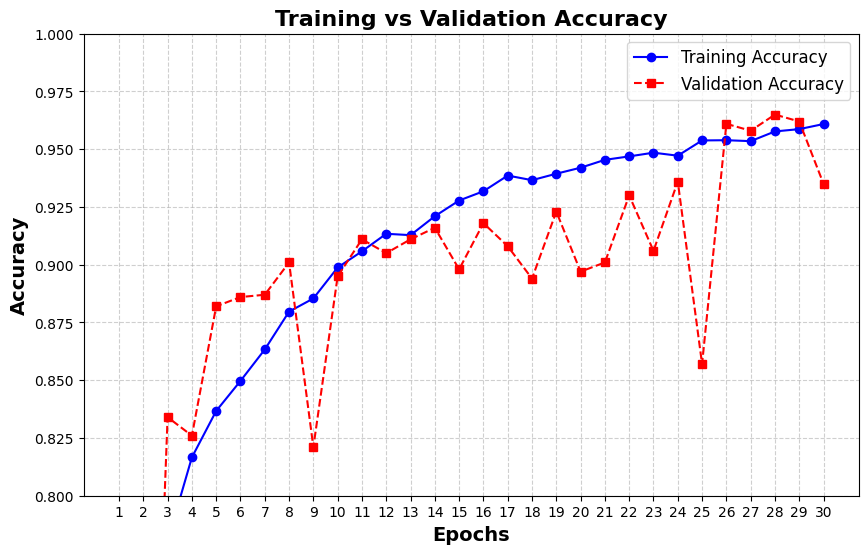

In [17]:

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='s', linestyle='--', color='red', label='Validation Accuracy')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Accuracy', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1)  
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


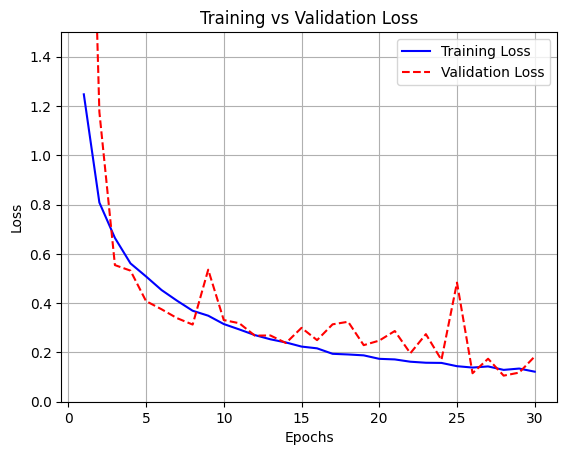

In [25]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.ylim(0, 1.5)  

plt.show()


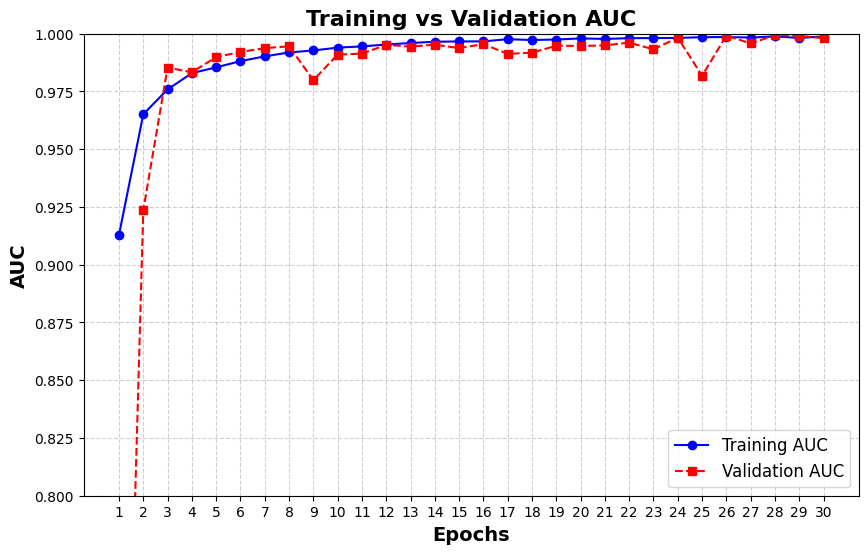

In [19]:

train_auc = history.history['auc']
val_auc = history.history['val_auc']
\
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_auc, marker='o', linestyle='-', color='blue', label='Training AUC')
plt.plot(epochs, val_auc, marker='s', linestyle='--', color='red', label='Validation AUC')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('AUC', fontsize=14, fontweight='bold')
plt.title('Training vs Validation AUC', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1)  # Adjust Y-axis range
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


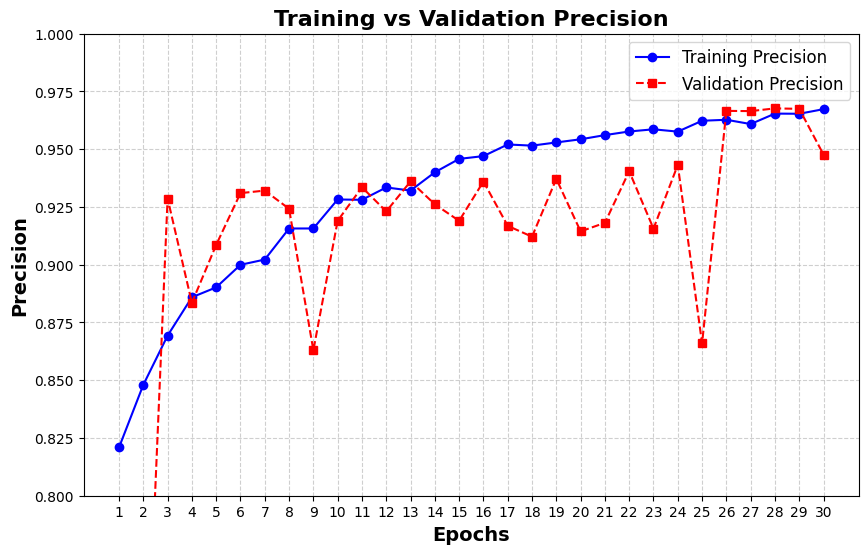

In [20]:

train_precision = history.history['precision']
val_precision = history.history['val_precision']


plt.figure(figsize=(10, 6))
plt.plot(epochs, train_precision, marker='o', linestyle='-', color='blue', label='Training Precision')
plt.plot(epochs, val_precision, marker='s', linestyle='--', color='red', label='Validation Precision')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Precision', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1) 
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


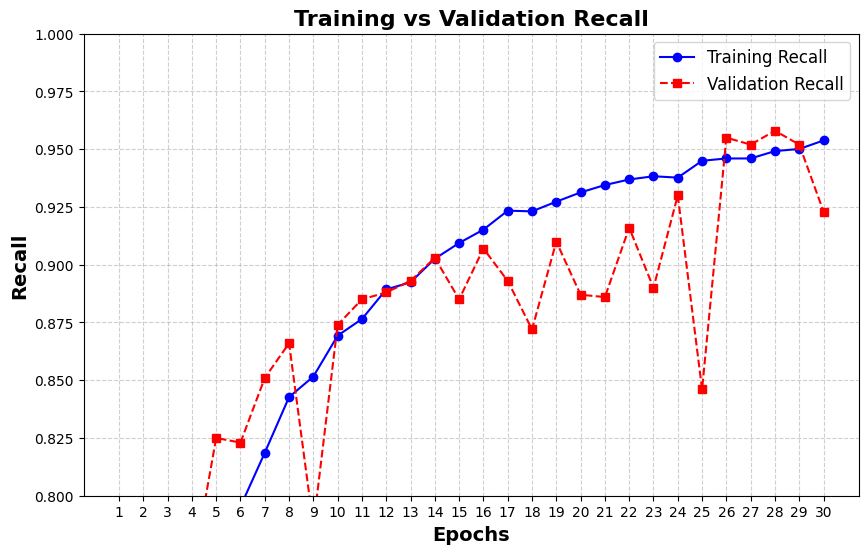

In [21]:

train_recall = history.history['recall']
val_recall = history.history['val_recall']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_recall, marker='o', linestyle='-', color='blue', label='Training Recall')
plt.plot(epochs, val_recall, marker='s', linestyle='--', color='red', label='Validation Recall')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Recall', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Recall', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1)
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


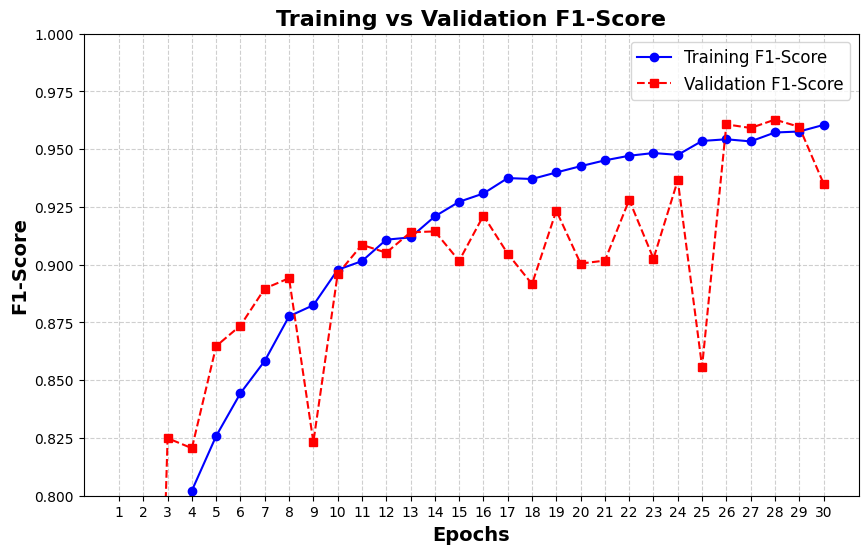

In [22]:
train_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(train_precision, train_recall)]
val_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(val_precision, val_recall)]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_f1, marker='o', linestyle='-', color='blue', label='Training F1-Score')
plt.plot(epochs, val_f1, marker='s', linestyle='--', color='red', label='Validation F1-Score')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score', fontsize=14, fontweight='bold')
plt.title('Training vs Validation F1-Score', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1) 
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


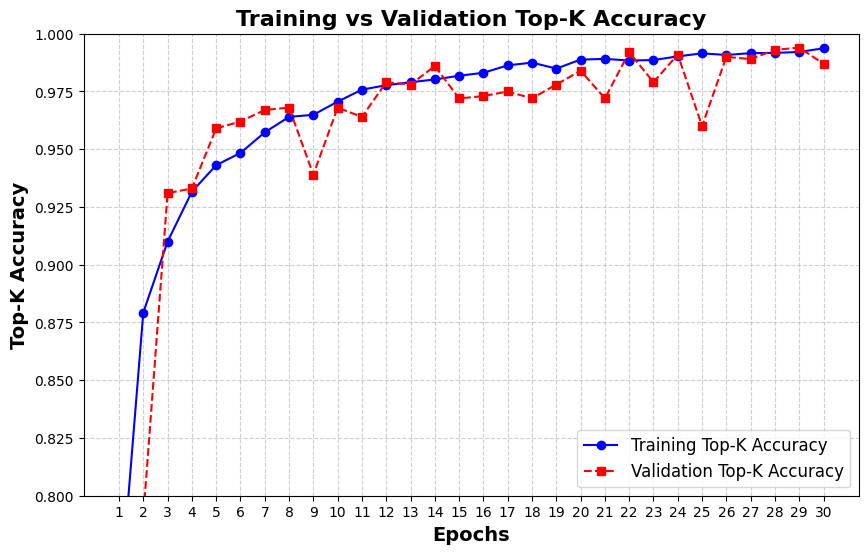

In [23]:
train_topk = history.history['top_k_categorical_accuracy']
val_topk = history.history['val_top_k_categorical_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_topk, marker='o', linestyle='-', color='blue', label='Training Top-K Accuracy')
plt.plot(epochs, val_topk, marker='s', linestyle='--', color='red', label='Validation Top-K Accuracy')

plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Top-K Accuracy', fontsize=14, fontweight='bold')
plt.title('Training vs Validation Top-K Accuracy', fontsize=16, fontweight='bold')

plt.ylim(0.8, 1)
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,120 (5.04 MB)

 Trainable params: 440,074 (1.68 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 880,150 (3.36 MB)

NameError: name 'val' is not defined